In [143]:
import numpy as np
import pandas as pd

In [144]:
data = pd.read_csv("C:/data science material/telco_churn/notebook/data/telco_churn_data.csv")

In [252]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [364]:
data.shape

(7043, 21)

In [145]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [146]:
data.dtypes=="object"

customerID           True
gender               True
SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
PhoneService         True
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
TotalCharges         True
Churn                True
dtype: bool

In [147]:
def separate_categorical_and_continious_data(data):
    categorical_columns = []
    numerical_columns  =[]
    DataColumns = data.columns
    for col in data[DataColumns]:
        if data[col].dtypes =="object":
            categorical_columns.append(col)
        else:
            numerical_columns.append(col)
    return categorical_columns , numerical_columns

categorical_columns , numerical_columns = separate_categorical_and_continious_data(data)
print(f"categorical_columns : {categorical_columns}")
print(f"numerical_columns : {numerical_columns}")

categorical_columns : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
numerical_columns : ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [148]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [149]:
def encode_categories_with_labelencoder(features_list):
    for feature in features_list:
        data[feature] = encoder.fit_transform(data[feature])
    return data

In [150]:
data_labelencoded = encode_categories_with_labelencoder(categorical_columns)

In [151]:
data_labelencoded

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1597,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,5698,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,2994,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,2660,1


In [152]:
from sklearn.model_selection import train_test_split
X = data_labelencoded.drop(["Churn"],axis =1 )
y = data_labelencoded["Churn"]

In [153]:
X_train , X_test, y_train , y_test = train_test_split(X,y, test_size=0.2)

In [154]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((5634, 20), (1409, 20), (5634,), (1409,))

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def apply_standardization(X_train , X_test):
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test

In [156]:
X_train , X_test = apply_standardization(X_train , X_test)

In [157]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((5634, 20), (1409, 20), (5634,), (1409,))

In [158]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train,y_train)
model_log_reg_predictions = model_log_reg.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [160]:
# Evaluate model performance
accuracy = accuracy_score(y_test, model_log_reg_predictions)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, model_log_reg_predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, model_log_reg_predictions))

Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[930 106]
 [176 197]]


Analysis and Conclusion
Accuracy: The model achieved an accuracy of 81%, indicating it correctly classified 81% of the test samples.

Precision:

For class 0 (non-churn): 0.87 (high precision, indicating few false positives).
For class 1 (churn): 0.59 (lower precision, suggesting more false positives in predicting churn).
Recall:

For class 0: 0.89 (high recall, capturing most non-churn cases).
For class 1: 0.56 (lower recall, indicating missed churn cases).
F1-Score:

Class 0: 0.88 (good balance of precision and recall).
Class 1: 0.57 (indicates difficulty in accurately identifying churners).
Confusion Matrix:

True Negatives (TN): 967 (correctly predicted non-churn).
False Positives (FP): 122 (incorrectly predicted churn).
False Negatives (FN): 142 (missed churn cases).
True Positives (TP): 178 (correctly predicted churn).

In [161]:
len(y_test.values)

1409

In [162]:
len(model_log_reg_predictions)

1409

In [163]:
pd.DataFrame({"Actual Vals":y_test.values ,
 "Predicted Vals":model_log_reg_predictions})

,Actual Vals,Predicted Vals
0,0,1
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
1404,0,0
1405,0,1
1406,0,0
1407,0,0


**SVM**

In [164]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [175]:
# Instantiate the SVM model
svm_model = SVC(kernel='linear') 

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)

In [166]:
svm_predictions

array([1, 0, 1, ..., 0, 0, 1])

In [167]:
# Evaluate the model
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[927 109]
 [176 197]]


The model achieved an accuracy of 80%, meaning it made correct predictions most of the time. It performed well for class 0, with 84% precision, but struggled with class 1, having only 64% precision. The confusion matrix shows it misclassified 109 class 0 instances as class 1 and 176 class 1 instances as class 0, indicating room for improvement in predicting the positive class.

In [179]:
len(y_test.values)

1409

In [177]:
svm_df = pd.DataFrame({
    "Actual Vals": y_test.values,
    "Predicted Vals": svm_predictions
})

In [178]:
svm_df

,Actual Vals,Predicted Vals
0,0,1
1,1,0
2,0,1
3,0,0
4,0,0
...,...,...
1404,0,0
1405,0,0
1406,0,0
1407,0,0


The model performs well for predicting non-churners but has difficulty accurately identifying customers who will churn. It suggests that improvements could be made to better recognize churners, such as trying different algorithms or adjusting the model settings.

**NAIYES BAYES**

In [168]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [180]:
# Instantiate the Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model on the training data
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test data
nb_predictions = naive_bayes_model.predict(X_test)

In [170]:
nb_predictions

array([1, 1, 1, ..., 0, 0, 1])

In [181]:
len(nb_predictions)

1409

In [182]:
# Evaluate the model
accuracy = accuracy_score(y_test, nb_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, nb_predictions))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_predictions))

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1036
           1       0.51      0.72      0.60       373

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.78      0.74      0.75      1409

Confusion Matrix:
[[779 257]
 [105 268]]


Accuracy: The model correctly predicted the outcomes for 74% of the cases.

Precision:

For class 0 (not churn): 0.88 means when the model predicted a customer would not churn, it was correct 88% of the time.
For class 1 (churn): 0.51 means when the model predicted a customer would churn, it was correct only 51% of the time. This indicates many mistakes in predicting churners.
Recall:

For class 0: 0.75 means the model found 75% of all customers who did not churn correctly.
For class 1: 0.72 means the model found 72% of actual churners, which is relatively good.
F1-Score: This score balances precision and recall:

For class 0: 0.81 (good performance).
For class 1: 0.60 (shows room for improvement).
Confusion Matrix:

True Negatives (TN): 779 customers were correctly predicted as not churning.
False Positives (FP): 257 customers were incorrectly predicted as churning when they did not.
False Negatives (FN): 105 customers were incorrectly predicted as not churning when they actually did.
True Positives (TP): 268 customers were correctly predicted as churning.

In [183]:
nb_df = pd.DataFrame({
    "Actual Vals": y_test.values,
    "Predicted Vals": nb_predictions
})

In [184]:
nb_df

,Actual Vals,Predicted Vals
0,0,1
1,1,1
2,0,1
3,0,0
4,0,0
...,...,...
1404,0,0
1405,0,1
1406,0,0
1407,0,0


**Decision Tree** 

In [186]:
from sklearn.tree import DecisionTreeClassifier

In [187]:
# Initialize the Decision Tree classifier
model_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model_tree.fit(X_train, y_train)

# Make predictions on the test set
tree_predictions = model_tree.predict(X_test)

In [188]:
len(y_test.values)

1409

In [189]:
len(tree_predictions)

1409

In [190]:
tree_df = pd.DataFrame({
    "Actual Vals": y_test.values,
    "Predicted Vals": tree_predictions
})

In [191]:
tree_df

,Actual Vals,Predicted Vals
0,0,1
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
1404,0,0
1405,0,1
1406,0,0
1407,0,0


In [192]:
# Evaluate the model
accuracy = accuracy_score(y_test, tree_predictions)
class_report = classification_report(y_test, tree_predictions)
conf_matrix = confusion_matrix(y_test, tree_predictions)


In [193]:
accuracy

0.7239176721078779

In [196]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1036
           1       0.48      0.50      0.49       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.73      1409



In [197]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[833 203]
 [186 187]]


The Decision Tree model has an overall accuracy of 72%, meaning it correctly predicts the outcome 72% of the time. It performs well for class 0 (with 82% precision) but struggles with class 1, only achieving 48% precision. The confusion matrix shows that it incorrectly predicted 203 instances of class 0 as class 1 and 186 instances of class 1 as class 0.

**Random Forest**

In [198]:
from sklearn.ensemble import RandomForestClassifier

In [199]:
# Initialize the Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = model_rf.predict(X_test)

In [200]:
rf_predictions

array([1, 1, 0, ..., 0, 0, 1])

In [201]:
len(rf_predictions)

1409

In [203]:
rf_df = pd.DataFrame({
    "Actual Vals": y_test.values,
    "Predicted Vals": rf_predictions
})

In [205]:
rf_df

,Actual Vals,Predicted Vals
0,0,1
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
1404,0,0
1405,0,1
1406,0,0
1407,0,0


In [202]:
# Evaluate the model
accuracy = accuracy_score(y_test, rf_predictions)
class_report = classification_report(y_test, rf_predictions)
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(class_report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.63      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
[[929 107]
 [191 182]]


The Random Forest model achieved an accuracy of 79%, correctly predicting the outcome most of the time. It performs well for class 0, with 83% precision, but struggles with class 1, only achieving 63% precision. The confusion matrix shows that it misclassified 107 instances of class 0 as class 1 and 191 instances of class 1 as class 0.

# **The Logistic Regression model is the best with an accuracy of 81%. The Support Vector Machine (SVM) model follows closely with an accuracy of 80%, while the Random Forest model has a slightly lower accuracy of 79%. So, the ranking of the models is: Logistic Regression first, SVM second, and Random Forest third.**

In [227]:
from sklearn.model_selection import  GridSearchCV

In [228]:
# Define the logistic regression model
logistic = LogisticRegression(max_iter=200, random_state=0, solver='saga')

In [229]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
    'solver': ['saga'],  # Saga solver supports l1, l2, and elasticnet
    'l1_ratio': [0.1, 0.5, 0.9]  # Elasticnet requires an l1_ratio
}


In [230]:
# Create the GridSearchCV object
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [231]:
grid_search.fit(X_train, y_train)

c:\data science material\telco_churn\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=200, random_state=0,
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             scoring='accuracy')

In [232]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [235]:
# Create the logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(C=0.01, penalty='l2', solver='saga', max_iter=200, random_state=0)

# Fit the model on the training data
best_logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_logistic_model.predict(X_test)

In [236]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [238]:
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(confusion_mat)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[946  90]
 [187 186]]


The model has an accuracy of 80%, performing well for non-churners (Class 0) with 91% recall and 87% f1-score.
For churners (Class 1), it correctly identifies 50% of them, but has lower precision and recall.
Overall, the model performs better at predicting non-churners than churners.

In [249]:
hyperparameter_df = pd.DataFrame({'Actual Vals': y_test, 'Predicted Vals': y_pred})

In [250]:
hyperparameter_df

,Actual Vals,Predicted Vals
4705,0,0
2494,1,0
6201,0,0
1155,0,0
2014,0,0
...,...,...
1975,0,0
1813,0,1
382,0,0
5041,0,0


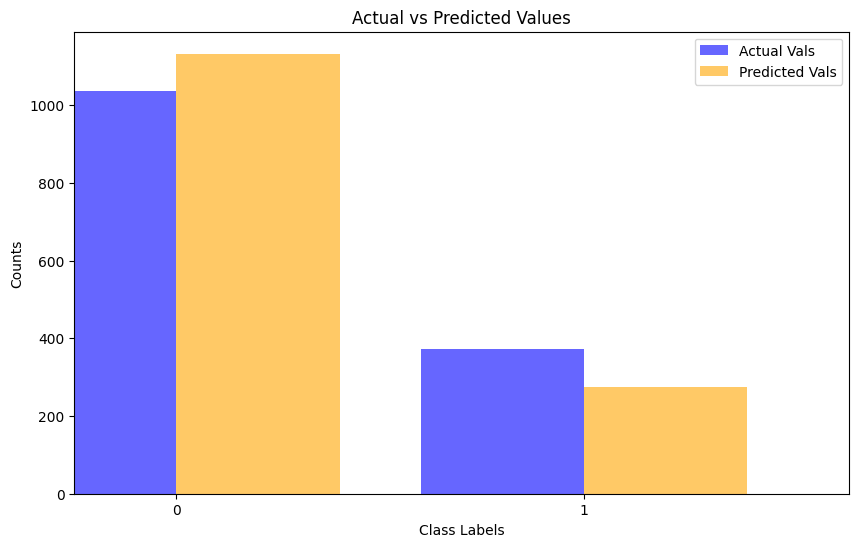

In [251]:
# Count the occurrences of each class in Actual and Predicted
actual_counts = hyperparameter_df['Actual Vals'].value_counts().sort_index()
predicted_counts = hyperparameter_df['Predicted Vals'].value_counts().sort_index()

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Bar plot for actual values
actual_counts.plot(kind='bar', color='blue', alpha=0.6, label='Actual Vals', width=0.4, position=1)

# Bar plot for predicted values
predicted_counts.plot(kind='bar', color='orange', alpha=0.6, label='Predicted Vals', width=0.4, position=0)

plt.title('Actual vs Predicted Values')
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.legend()
plt.show()

In [237]:
accuracy

0.8034066713981547

In [171]:
data_labelencoded.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [172]:
payload = {"customerID":[12345], "gender":[0], "SeniorCitizen":[0], "Partner":[0], "Dependents":[0],
       "tenure":[0], "PhoneService":[0], "MultipleLines":[0], "InternetService":[0],
       "OnlineSecurity":[0], "OnlineBackup":[0], "DeviceProtection":[0], "TechSupport":[0],
       "StreamingTV":[0], "StreamingMovies":[0], "Contract":[0], "PaperlessBilling":[0],
       "PaymentMethod":[0], "MonthlyCharges":[18.8], "TotalCharges":[18.8]}

In [329]:
payload.shape

(21,)

In [173]:
inference_payload = pd.DataFrame(payload)
inference_payload

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,12345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.8,18.8


In [174]:
model_log_reg.predict(inference_payload)

c:\data science material\telco_churn\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0])

In [365]:
# Select the first row for inference
payload_1= data.iloc[7]


In [366]:
payload_1

customerID          4770.00
gender                 0.00
SeniorCitizen          0.00
Partner                0.00
Dependents             0.00
tenure                10.00
PhoneService           0.00
MultipleLines          1.00
InternetService        0.00
OnlineSecurity         2.00
OnlineBackup           0.00
DeviceProtection       0.00
TechSupport            0.00
StreamingTV            0.00
StreamingMovies        0.00
Contract               0.00
PaperlessBilling       0.00
PaymentMethod          3.00
MonthlyCharges        29.75
TotalCharges        2609.00
Churn                  0.00
Name: 7, dtype: float64

<Axes: >

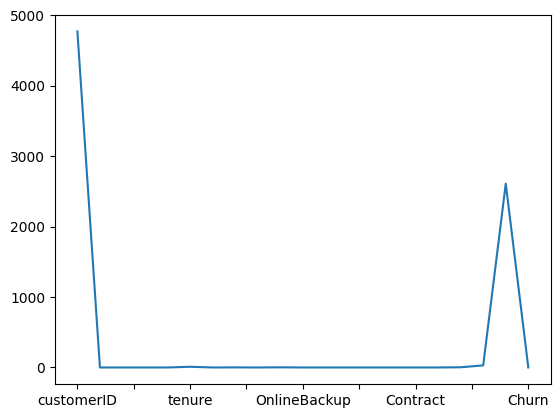

In [367]:
payload_1.plot()

In [378]:
inference_payload = {
    "customerID": [payload_1['customerID']],
    "gender": [payload_1['gender']],
    "SeniorCitizen": [payload_1['SeniorCitizen']],
    "Partner": [payload_1['Partner']],
    "Dependents": [payload_1['Dependents']],
    "tenure": [payload_1['tenure']],
    "PhoneService": [payload_1['PhoneService']],
    "MultipleLines": [payload_1['MultipleLines']],
    "InternetService": [payload_1['InternetService']],
    "OnlineSecurity": [payload_1['OnlineSecurity']],
    "OnlineBackup": [payload_1['OnlineBackup']], 
    "DeviceProtection": [payload_1['DeviceProtection']],
    "TechSupport": [payload_1['TechSupport']],
    "StreamingTV": [payload_1['StreamingTV']],
    "StreamingMovies": [payload_1['StreamingMovies']],
    "Contract": [payload_1['Contract']],
    "PaperlessBilling": [payload_1['PaperlessBilling']],
    "PaymentMethod": [payload_1['PaymentMethod']],
    "MonthlyCharges": [payload_1['MonthlyCharges']],
    "TotalCharges": [payload_1['TotalCharges']]
}

In [379]:
# Convert to DataFrame for consistency
inference_payload_df = pd.DataFrame(inference_payload)

In [380]:
inference_payload_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,4770.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,29.75,2609.0


In [381]:
data['OnlineSecurity'].unique()

array([0, 2, 1])

In [382]:
inference_payload_df.shape

(1, 20)

In [386]:
predicted_inference=model_log_reg.predict(inference_payload_df)

c:\data science material\telco_churn\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [389]:
predicted_inference

array([1])

In [404]:
# Add predictions to the DataFrame
inference_payload_df['Predicted_inference'] = predicted_inference

In [405]:
# Count the occurrences of each predicted class
prediction_counts = inference_payload_df['Predicted_interference'].value_counts()